In [3]:
!pip install yfinance
!pip install pandas requests
!pip install matplotlib




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 103.8 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 159.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 199.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 173.2 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-cp312-cp312-linux_x86_64.whl size=303801 sha256=cef176c103e3050a07ba0513d15e5268634b8a7345166e2c890f4fc344290a07
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/1a/57/6a/bb71346381d0d911cd4ce3026f1fa720da76707e4f01cf27dd
Successfully built peewee
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 157.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 148.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 92.6 MB/s eta 0:00:00
   ━━━━

In [10]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [11]:
GameSt = yf.Ticker("GMS")
GameSt_data = GameSt.history(period="max")
GameSt_data.reset_index(inplace=True)
print(GameSt_data.head())

                       Date       Open       High        Low      Close  \
0 2016-05-26 00:00:00-04:00  22.500000  22.990000  21.680000  21.910000   
1 2016-05-27 00:00:00-04:00  21.480000  22.500000  21.480000  22.500000   
2 2016-05-31 00:00:00-04:00  22.690001  22.889999  22.480000  22.809999   
3 2016-06-01 00:00:00-04:00  23.000000  23.750000  22.610001  23.110001   
4 2016-06-02 00:00:00-04:00  23.200001  23.200001  22.680000  22.850000   

    Volume  Dividends  Stock Splits  
0  5700000        0.0           0.0  
1   149500        0.0           0.0  
2   323300        0.0           0.0  
3   216400        0.0           0.0  
4   133100        0.0           0.0  


In [12]:

import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

data = []

tables = soup.find_all("table")
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        for row in table.tbody.find_all("tr"):
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue and date:
                    data.append({"Date": date, "Revenue": revenue})
        break  # Found the table, no need to keep searching
tesla_revenue = pd.DataFrame(data)
print(tesla_revenue.head())


         Date Revenue
0  2022-09-30   21454
1  2022-06-30   16934
2  2022-03-31   18756
3  2021-12-31   17719
4  2021-09-30   13757


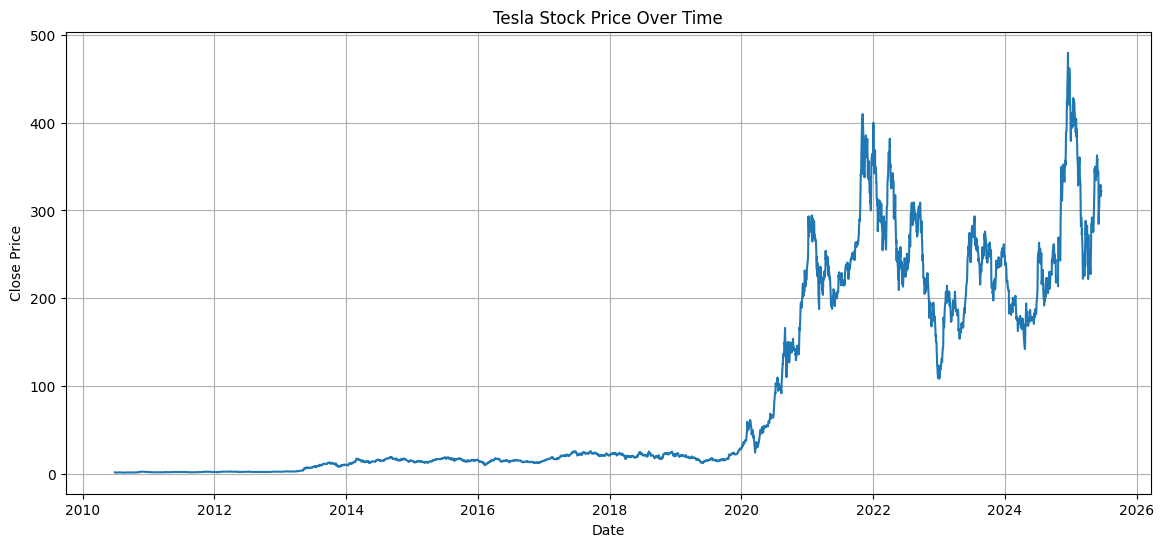

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(tesla_data['Date'], tesla_data['Close'])
plt.title("Tesla Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)

plt.show()


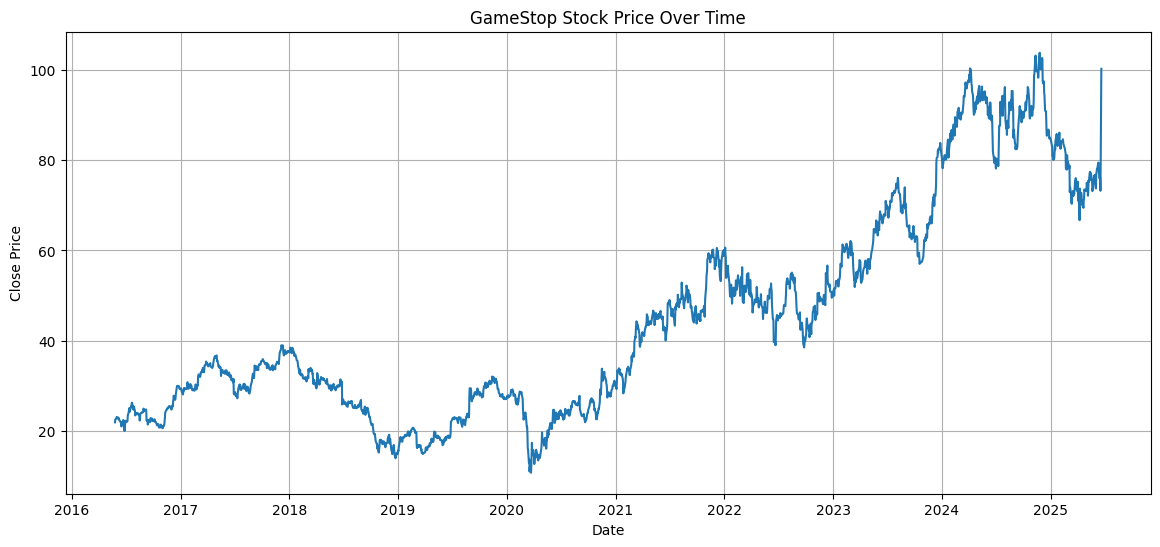

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.plot(GameSt_data['Date'], GameSt_data['Close'])
plt.title("GameStop Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()
